# Computer Recognition: openCV cheat sheet
Dataset available on [Kaggle](https://www.kaggle.com/mielek/operations-with-opencv).

Thanks to Muhammet Ikbal Elek, author of part of this tutorial. Complete original version available [here](https://www.kaggle.com/mielek/basic-operations-with-opencv?).

Topics covered:
- Reading Images
- Grayscaling
- Color Spaces
- Histograms
- Drawing on Images

In [1]:
# importing libs
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Reading Images

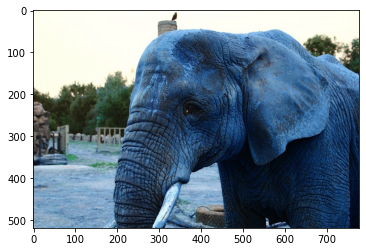

In [17]:
# load image
image = cv2.imread('1elephant.jpg')
plt.imshow(image)

In [19]:
# print dimensions
print(f'Height of Image: {image.shape[0]} pixels')
print(f'Width of Image: {image.shape[1]} pixels')

Height of Image: 519 pixels
Width of Image: 778 pixels


### Grayscaling
Grayscaling is process by which an image is converted from a full color to shades of grey (black & white)

In OpenCV, many functions grayscale images before processing. This is done because it simplifies the image, acting almost as a noise reduction and increasing processing time as there is less information in the image.

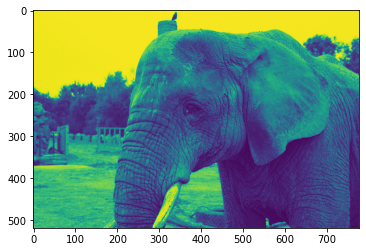

In [22]:
# use cvtColor to convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

### Checking RGB scale

In [28]:
# BGR Values for the first 0,0 pixel
B, G, R = image[10, 50] 
print(B, G, R)
print(image.shape)

255 255 243
(519, 778, 3)


In [30]:
# convert this pixel to grayscale
# It's now only 2 dimensions. Each pixel coordinate has only one value (previously 3) with a range of 0 to 255
gray_image_2 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(gray_image_2.shape)
print(gray_image_2[10, 50]) 

(519, 778)
251


In [31]:
gray_image_2[0,0]

251

### Color space: HSV
Another color filtering that could be useful.

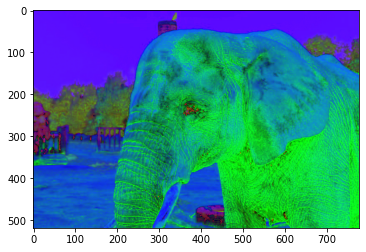

In [32]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_image)

### Histograms
Visualizing individual color components.

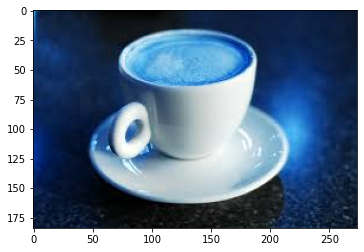

In [34]:
# load image
image2 = cv2.imread('1coffee.jpg')
plt.imshow(image2)

In [40]:
# ploting histogram
histogram = cv2.calcHist([image2], [0], None, [256], [0, 256])

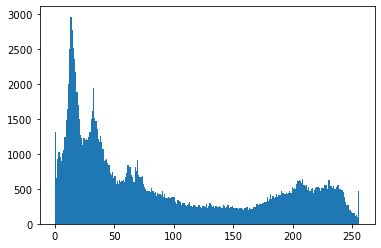

In [41]:
# We plot a histogram, ravel() method flatens our image array 
plt.hist(image2.ravel(), 256, [0, 256]); plt.show()

In [37]:
# Viewing Separate Color Channels
color = ('b', 'g', 'r')

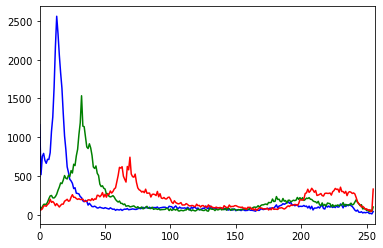

In [42]:
# We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image2], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])

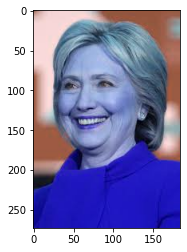

In [39]:
# load image
image3 = cv2.imread('1hillary.jpg')
plt.imshow(image3)

In [43]:
# ploting histogram
histogram = cv2.calcHist([image3], [0], None, [256], [0, 256])

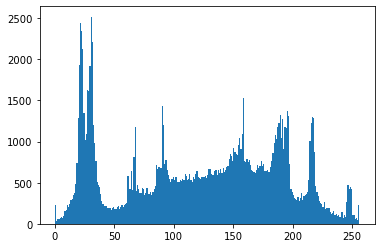

In [44]:
# We plot a histogram, ravel() method flatens our image array 
plt.hist(image3.ravel(), 256, [0, 256]); plt.show()

In [45]:
# Viewing Separate Color Channels
color = ('b', 'g', 'r')

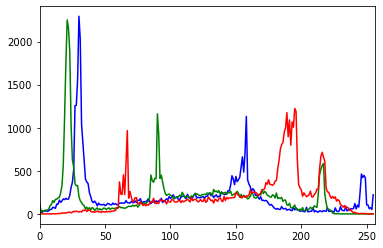

In [46]:
# We now separate the colors and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image3], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])

### Drawing images and shapes

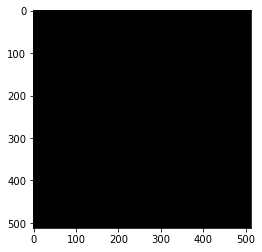

In [47]:
# ploting a black square
black_image = np.zeros((512,512,3), np.uint8)
plt.imshow(black_image)

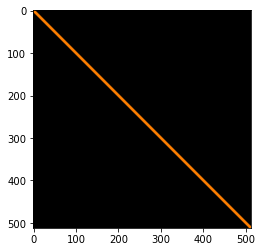

In [48]:
# draw a line on our black square
# cv2.line(image, starting cordinates, ending cordinates, color, thickness)
# Draw a diagonal  line of thickness of 5 pixels
cv2.line(black_image, (0,0), (511,511), (255,127,0), 5)
plt.imshow(black_image)

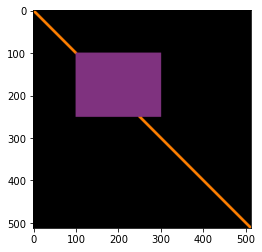

In [49]:
# draw a rectangle
# cv2.rectangle(image, starting vertex, opposite vertex, color, thickness)
cv2.rectangle(black_image, (100,100), (300,250), (127,50,127), -1)
plt.imshow(black_image)

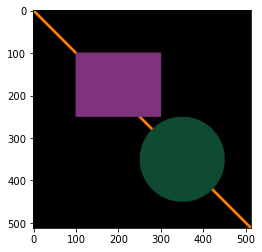

In [55]:
# draw a circle
# cv2.cirlce(image, center, radius, color, fill)
cv2.circle(black_image, (350, 350), 100, (15,75,50), -1) 
plt.imshow(black_image)

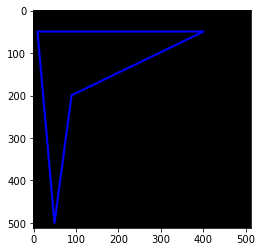

In [59]:
# draw polygons
# Let's define four points
new_image = np.zeros((512,512,3), np.uint8)
points = np.array( [[10,50], [400,50], [90,200], [50,500]], np.int32)

# Let's now reshape our points in form  required by polylines
points = points.reshape((-1,1,2))

cv2.polylines(new_image, [points], True, (0,0,255), 3)
plt.imshow(new_image)

### Writting text
cv2.putText(image, 'Text to Display', bottom left starting point, Font, Font Size, Color, Thickness)

- FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN
- FONT_HERSHEY_DUPLEX,FONT_HERSHEY_COMPLEX
- FONT_HERSHEY_TRIPLEX, FONT_HERSHEY_COMPLEX_SMALL
- FONT_HERSHEY_SCRIPT_SIMPLEX
- FONT_HERSHEY_SCRIPT_COMPLEX

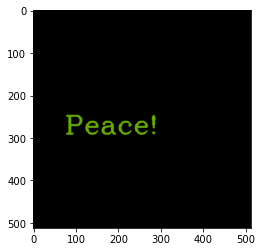

In [61]:
another_image = np.zeros((512,512,3), np.uint8)

cv2.putText(another_image,'Peace!', (75,290), cv2.FONT_HERSHEY_COMPLEX, 2, (100,170,0), 3)
plt.imshow(another_image)